In [1]:
# import numpy as np 
try:
    import matplotlib
    matplotlib.rcParams['text.usetex'] = True
except:
    pass
import matplotlib.pyplot as plt
import dcs.localEquilibrium 

In [2]:
surfField_DIIID = dcs.localEquilibrium.ArbitrarySurfaceField.readVMEC("wout_DIII-D.nc") 
surfField_DIIID.solveJacobian()

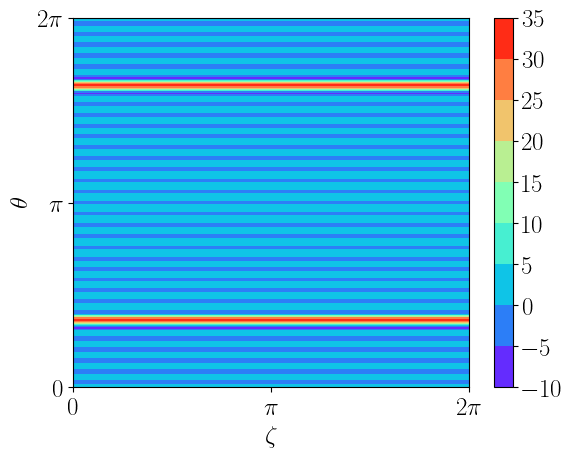

In [3]:
fig, ax = plt.subplots()
surfField_DIIID.Jacobian.plot_plt(ax=ax, fig=fig)

In [4]:
print(surfField_DIIID.lambdaField.imArr)

[-0.          0.26125769  0.14859644 -0.07269182 -0.01488682  0.03286226
 -0.01037462 -0.00936389  0.00872725  0.00039744 -0.00401286  0.00258037
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
